In [ ]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/Lab

/content/drive/MyDrive/Lab


In [ ]:
pip install pandas numpy scikit-learn matplotlib seaborn

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load the mushroom dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data"
columns = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
           'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring',
           'veil-type', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']
df = pd.read_csv(url, header=None, names=columns)

In [ ]:
# Perform EDA
print("Shape of the dataset:", df.shape)
print("First five rows of the dataset:")
print(df.head())

Shape of the dataset: (8124, 23)
First five rows of the dataset:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0              

In [ ]:
# Checking for missing values
print("Missing values in the dataset:")
print(df.isnull().sum())

Missing values in the dataset:
class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64


In [ ]:
# Checking the distribution of the target classes
print("Distribution of target classes:")
print(df['class'].value_counts())

Distribution of target classes:
class
e    4208
p    3916
Name: count, dtype: int64


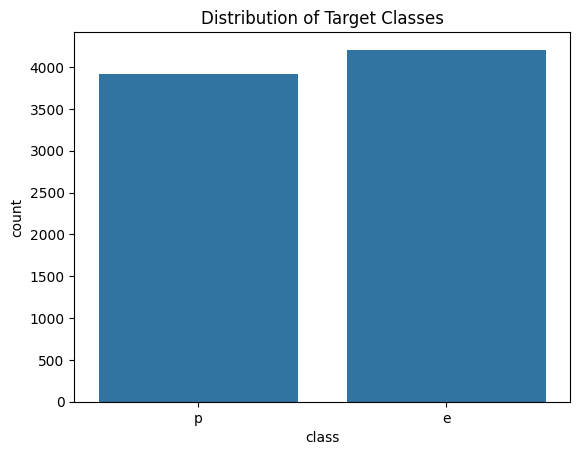

In [ ]:
# Visualizing the distribution of target classes
sns.countplot(x='class', data=df)
plt.title('Distribution of Target Classes')
plt.show()

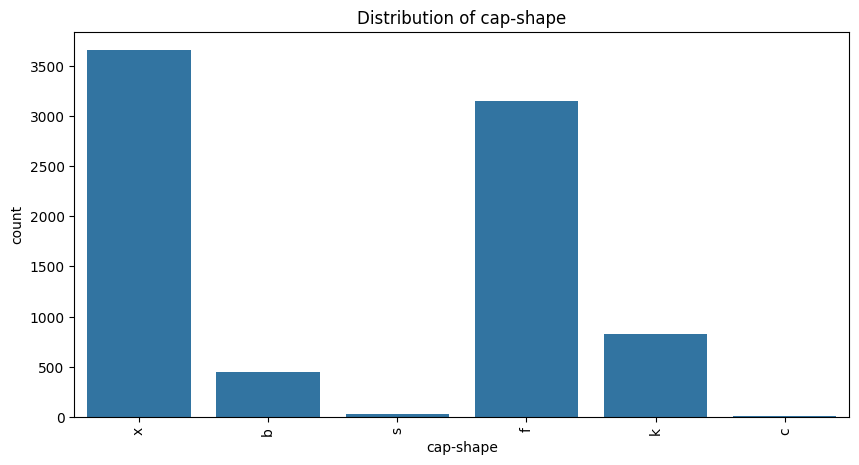

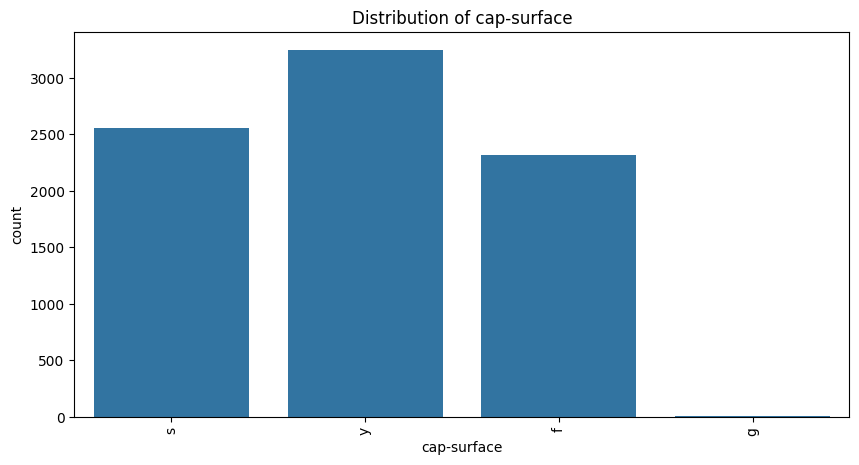

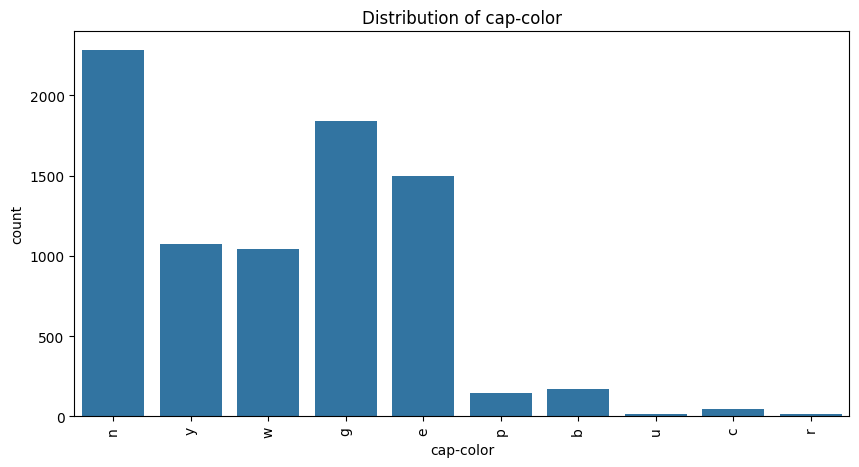

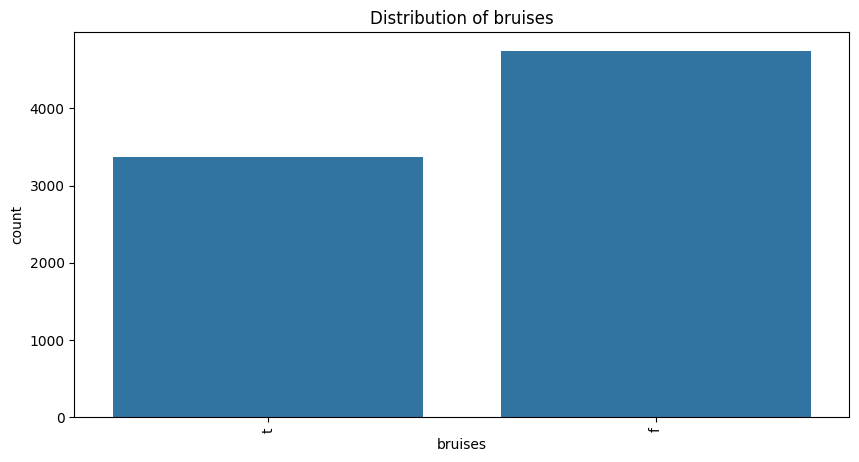

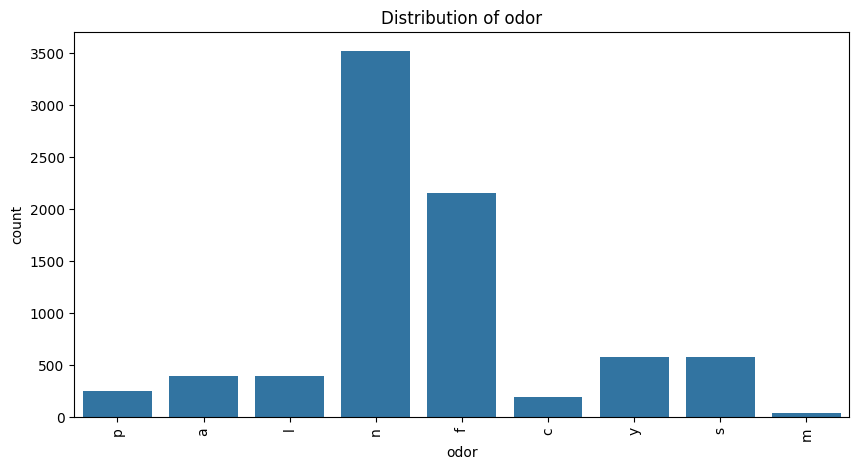

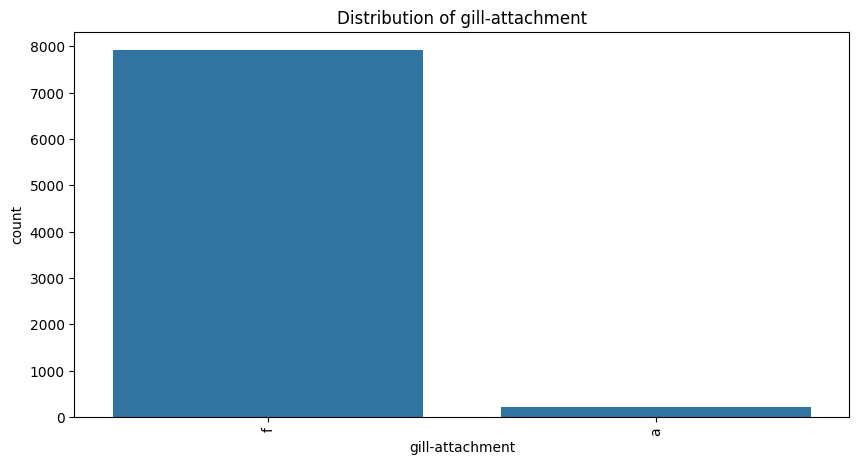

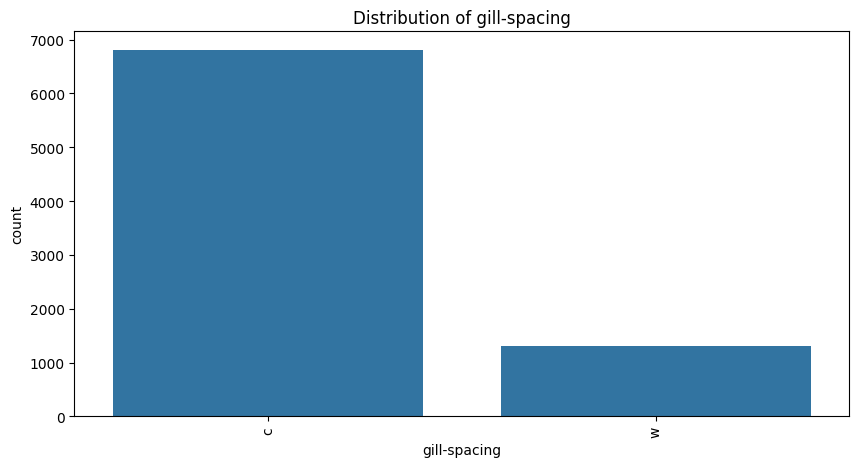

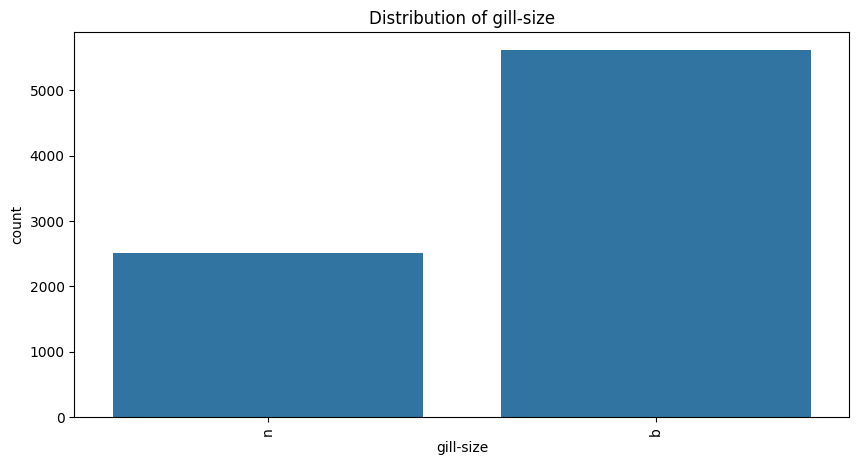

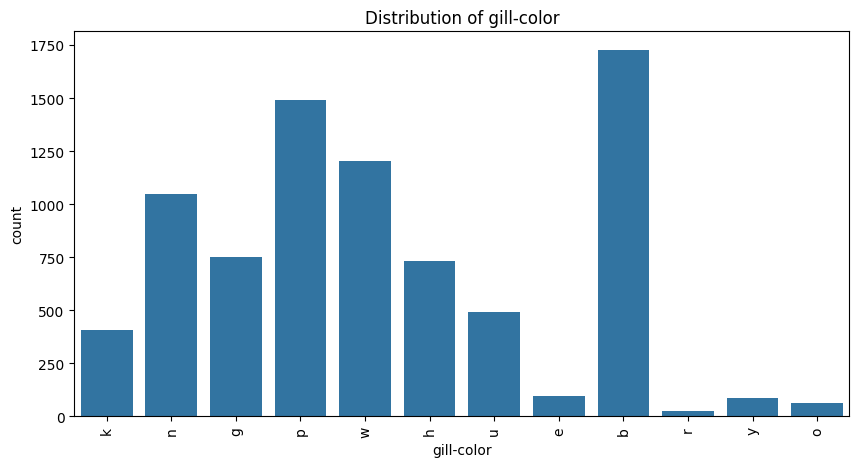

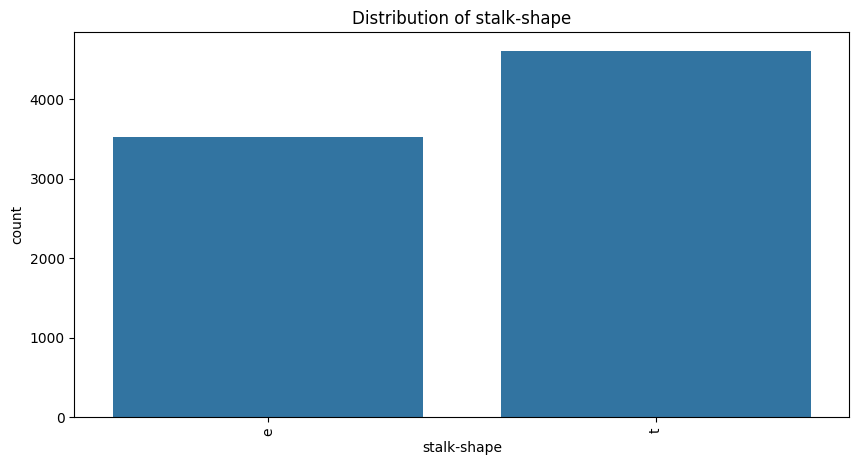

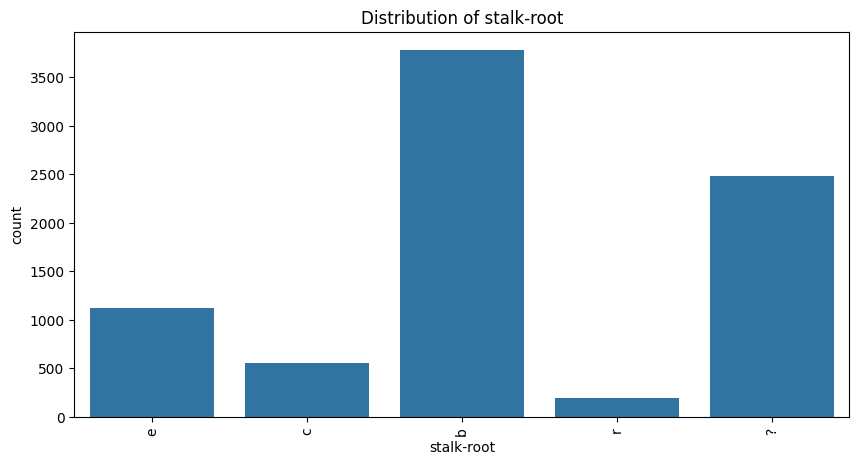

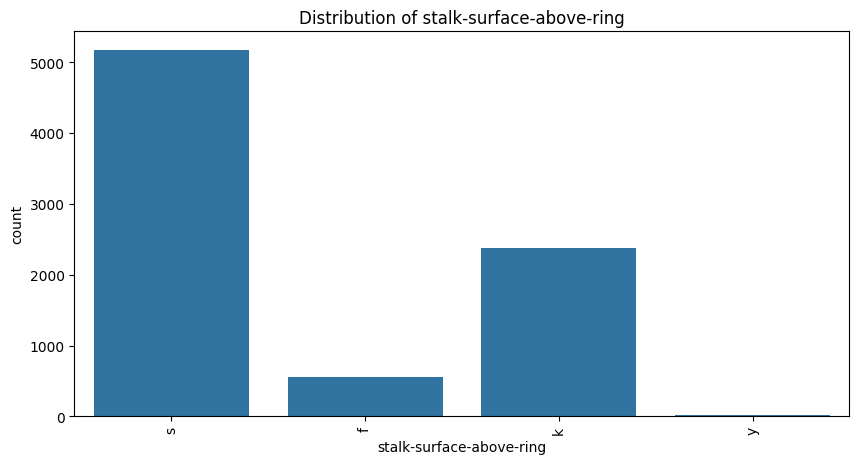

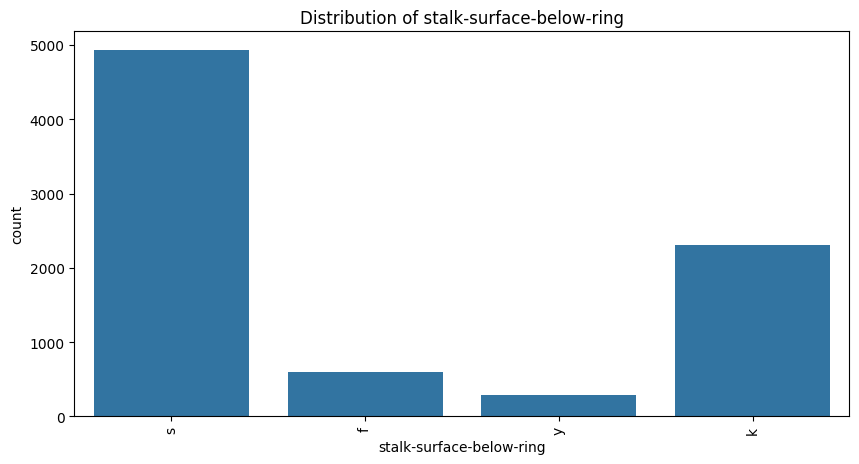

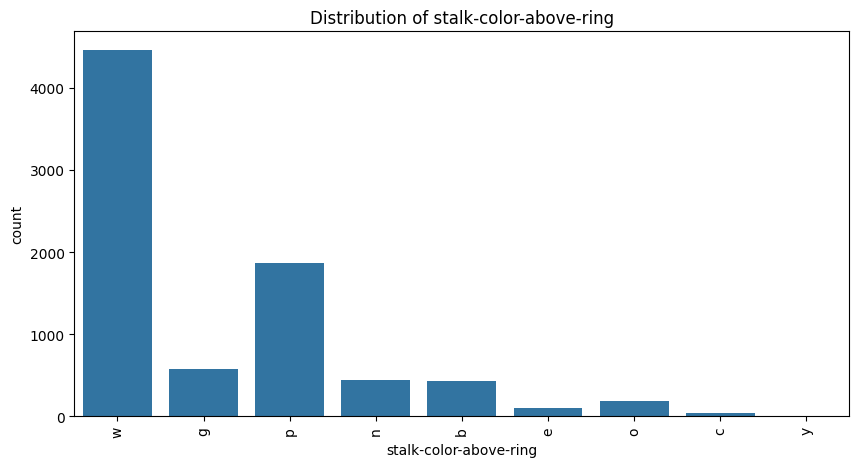

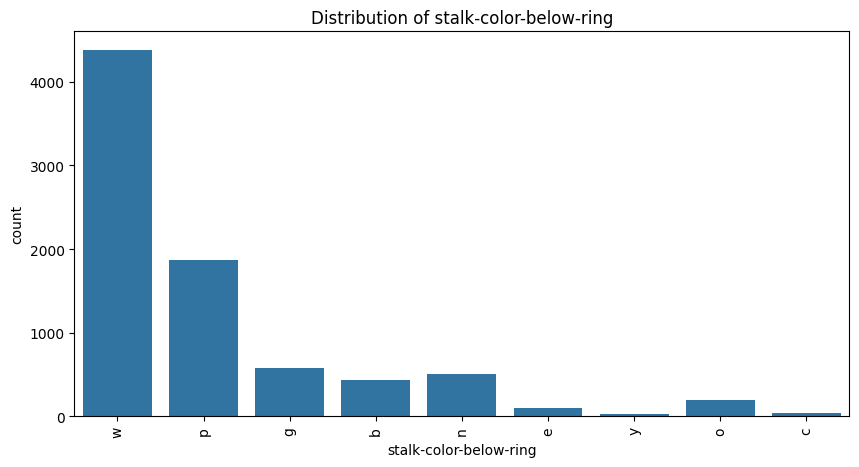

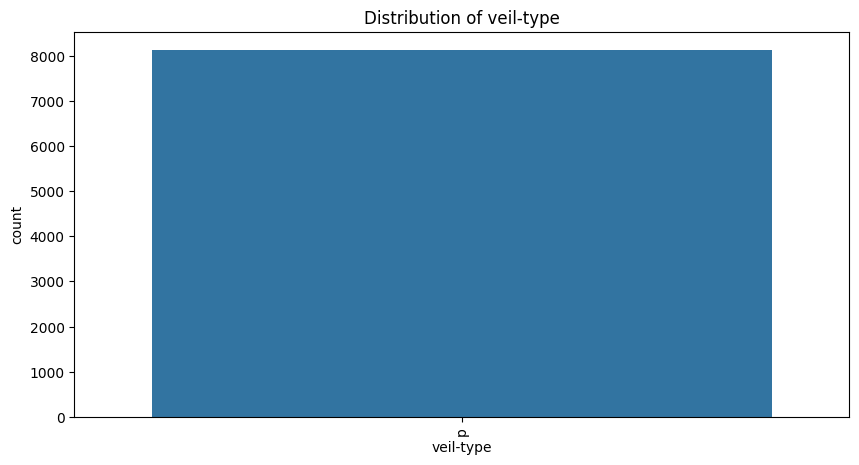

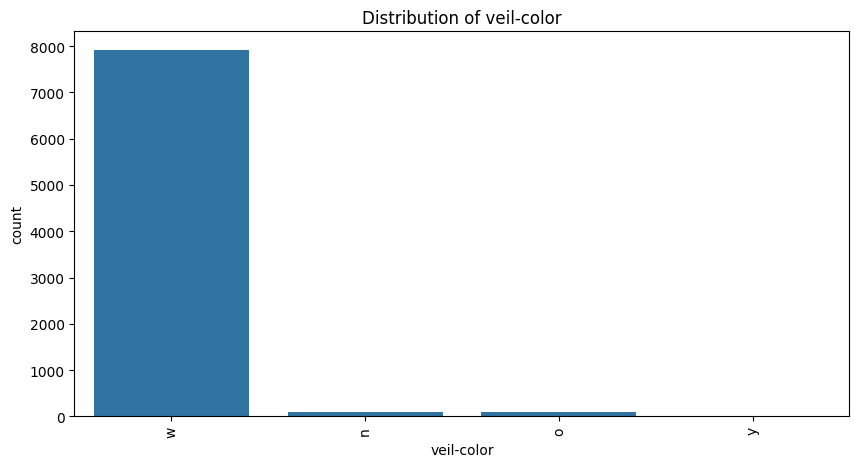

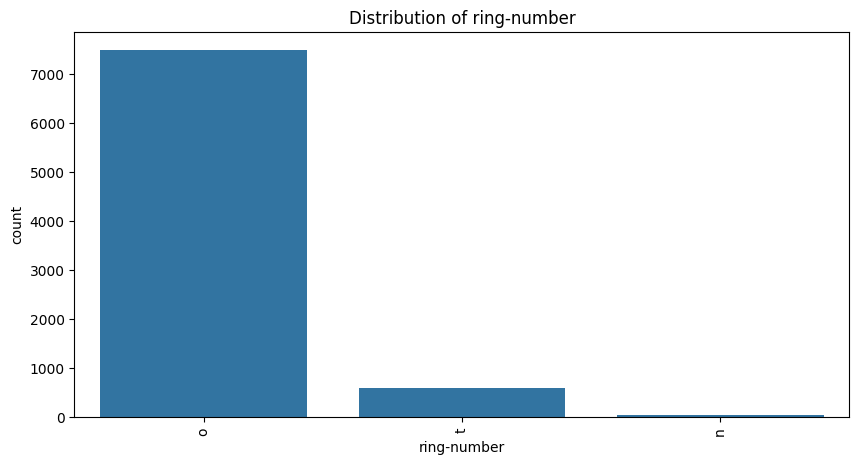

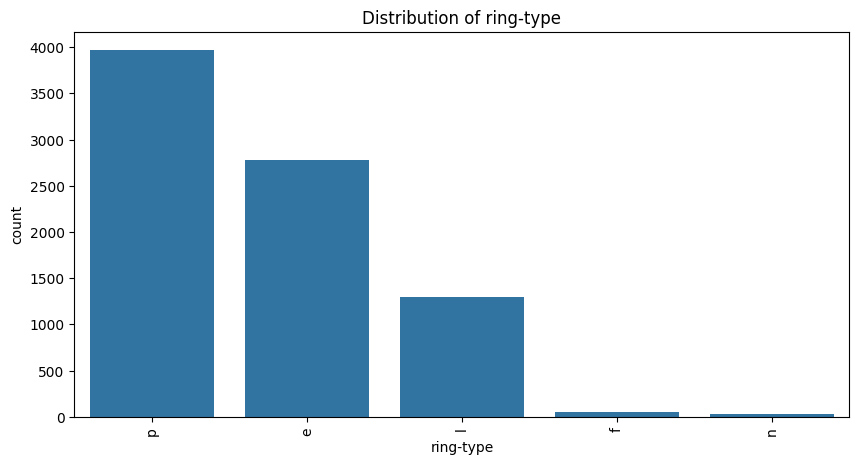

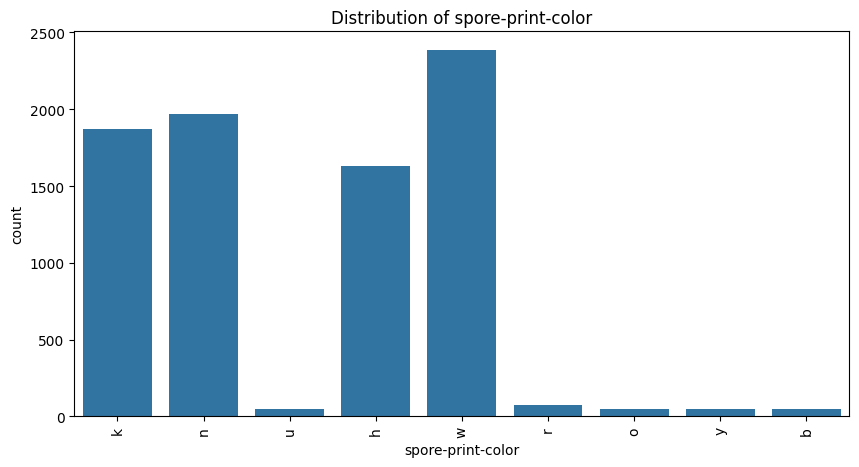

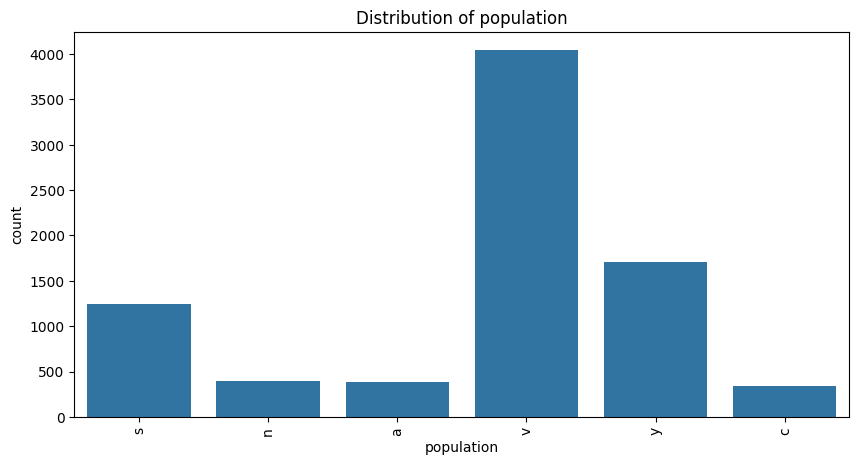

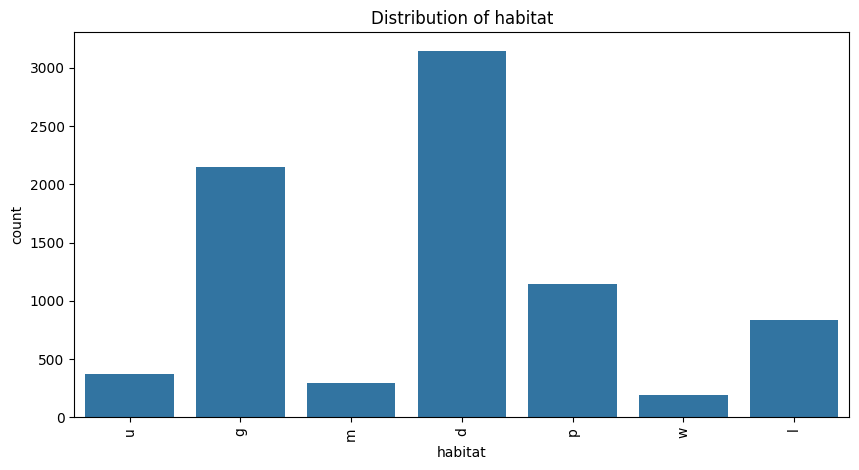

In [ ]:
# Visualizing the distribution of feature classes
for column in df.columns[1:]:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=column, data=df)
    plt.title(f'Distribution of {column}')
    plt.xticks(rotation=90)
    plt.show()

In [ ]:
# Encode categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
X = df_encoded.drop('class_p', axis=1)
y = df_encoded['class_p']

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Train and evaluate the Decision Tree Classifier
dt = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

In [ ]:
# Evaluate the Decision Tree model
acc_dt = accuracy_score(y_test, y_pred_dt)
report_dt = classification_report(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

In [ ]:
print("Decision Tree Classifier")
print(f"Accuracy: {acc_dt:.2f}")
print("Classification Report:")
print(report_dt)
print("Confusion Matrix:")
print(cm_dt)

Decision Tree Classifier
Accuracy: 0.98
Classification Report:
              precision    recall  f1-score   support

       False       1.00      0.96      0.98       843
        True       0.96      1.00      0.98       782

    accuracy                           0.98      1625
   macro avg       0.98      0.98      0.98      1625
weighted avg       0.98      0.98      0.98      1625

Confusion Matrix:
[[813  30]
 [  1 781]]


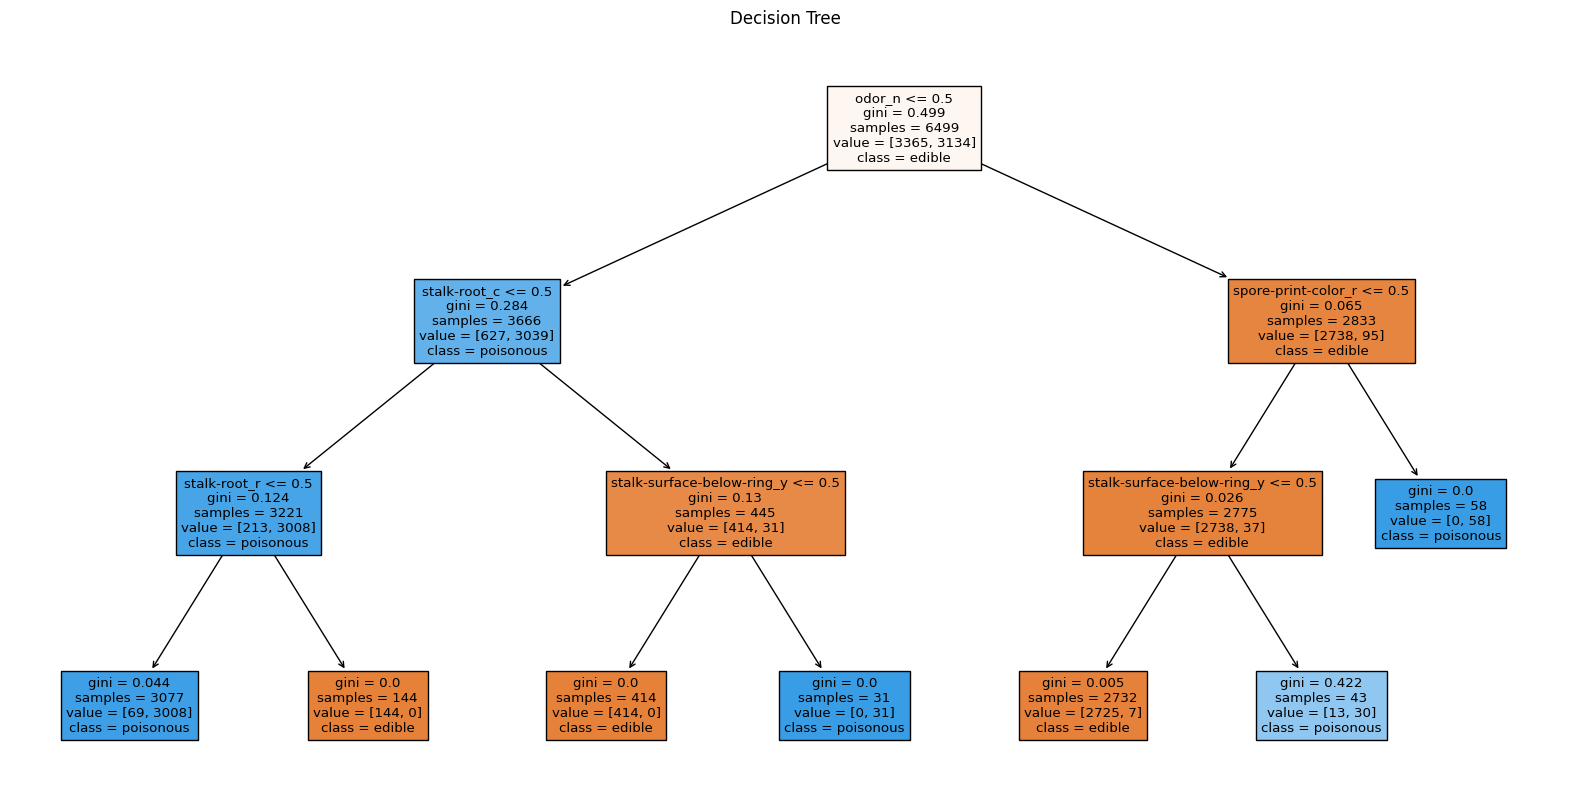

In [ ]:
# Plot the Decision Tree
plt.figure(figsize=(20, 10))
plot_tree(dt, feature_names=X.columns, class_names=['edible', 'poisonous'], filled=True)
plt.title('Decision Tree')
plt.show()

In [ ]:
# Train and evaluate the Random Forest Classifier with different n_estimators
n_estimators_values = [1, 50, 100, 150, 200, 250]
rf_accuracies = []

for n in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred_rf = rf.predict(X_test)
    acc_rf = accuracy_score(y_test, y_pred_rf)
    rf_accuracies.append(acc_rf)
    print(f"Random Forest with {n} estimators - Accuracy: {acc_rf:.2f}")

Random Forest with 1 estimators - Accuracy: 1.00
Random Forest with 50 estimators - Accuracy: 1.00
Random Forest with 100 estimators - Accuracy: 1.00
Random Forest with 150 estimators - Accuracy: 1.00
Random Forest with 200 estimators - Accuracy: 1.00
Random Forest with 250 estimators - Accuracy: 1.00


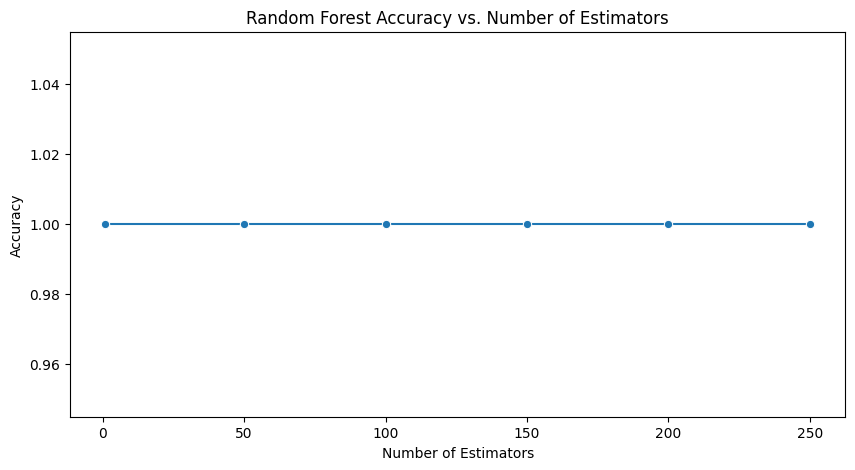

In [ ]:
# Plot the accuracies for different n_estimators
plt.figure(figsize=(10, 5))
sns.lineplot(x=n_estimators_values, y=rf_accuracies, marker='o')
plt.title('Random Forest Accuracy vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Accuracy')
plt.show()

In [ ]:
# Evaluate and compare the best Random Forest model with Decision Tree
best_rf = RandomForestClassifier(n_estimators=100, random_state=42)
best_rf.fit(X_train, y_train)
y_pred_best_rf = best_rf.predict(X_test)

acc_best_rf = accuracy_score(y_test, y_pred_best_rf)
report_best_rf = classification_report(y_test, y_pred_best_rf)
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)


In [ ]:
print("Best Random Forest Classifier")
print(f"Accuracy: {acc_best_rf:.2f}")
print("Classification Report:")
print(report_best_rf)
print("Confusion Matrix:")
print(cm_best_rf)

Best Random Forest Classifier
Accuracy: 1.00
Classification Report:
              precision    recall  f1-score   support

       False       1.00      1.00      1.00       843
        True       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

Confusion Matrix:
[[843   0]
 [  0 782]]
